# Week 9 : Case Study 5 - Bimal H M

## ANOVA

### STEP 1 : Importing all Necessary Libraries in to Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### STEP 2 : Reading the Dataset in to Notebook

In [2]:
data = pd.read_csv('sdzw.csv')

### STEP 3 : Checking the Dataset

#### A) Displaying Dataset Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


#### B) Checking for Null Values

In [4]:
data.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

#### C) Displaying First few Rows

In [5]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


### Q1 : The mean sales generated by each zone.

#### A) Through descriptive analysis

In [6]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


#### OR

In [7]:
data.describe().loc[['mean'],]

,Zone - A,Zone - B,Zone - C,Zone - D
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06


#### B) Through Direct Calculation

In [8]:
data.mean(axis=0)

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

### Q2 : Total sales generated by all the zones for each month

#### A) Direct calculation

In [9]:
data.sum(axis=1)

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

#### B) Printing along with dataset

In [10]:
data1 = data.copy()                                        #Copying dataset for convinence
data1['Monthly Sales'] = data1.sum(axis = 1)               #Creating a column for Monthly sum

In [11]:
data1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Monthly Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


### Q3 : Check whether all the zones generate the same amount of sales

###### To check whether all the zones generate the same amount of sales, we can conduct a Oneway ANOVA

#### A) ANOVA Hypotheses

<pre>
Null Hypothesis         :  All zones Generates the same amount of sales
Alternative hypothesis  :  There is a difference in sales with respect to regions  

That is, statistically 

H0   :  μ1 = μ2 = μ3 = μ4      (Groups means are equal/ no variation in means of groups)
H1   :  All μ are not equal    (At least, one group mean is different from other groups)

(Where μ is mean)

........

and Let the Level of significance be  <b>α = 0.05</b>

#### B) Generating a boxplot to see the data distribution

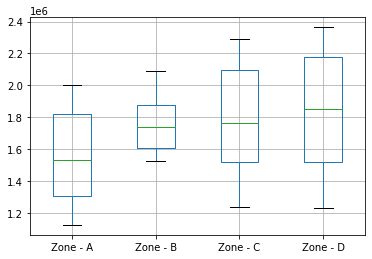

In [12]:
data.boxplot()
plt.show()

#### C) Testing for Oneway ANOVA  and finding test statistic and corresponding P-Value

In [13]:
f_value,p_value = stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

In [14]:
print('f Satatistic Value : ',f_value)
print('p Value            : ', p_value)

f Satatistic Value :  5.672056106843581
p Value            :  0.0011827601694503335


<b>Interpretation</b><br>
The p value obtained from ANOVA analysis is significant (0.00118< 0.05) and therefore we may reject H0 and may accept H1 at this level of significance, and we conclude that there is atleast one region is differ in sales.

#### D) post hoc comparision

From Boxplot it is clear that Zone - A's median value is much differ from others compared to others. so lets do a Oneway anova with Zone B, Zone C, Zone D.

<b> ANOVA Hypothesis </b>
<pre>
H0   :  μ1 = μ2 = μ3           (Groups means are equal/ no variation in means of groups)
H1   :  All μ are not equal    (At least, one group mean is different from other groups)

(Where μ is mean)

........

and Let the Level of significance be  <b>α = 0.05</b>

In [15]:
#Testing for F-statistic and p_value
stats.f_oneway(data['Zone - B'],data['Zone - C'],data['Zone - D'])

F_onewayResult(statistic=0.664930060574225, pvalue=0.5169953047432613)

<b>Interpretation</b><br>
The p value obtained from ANOVA analysis is not significant (0.516 > 0.05) and therefore we do not have enough evidence to reject H0 at given significance level, hence we may accept H0 at this level of significance, and we conclude that these 3 regions have same amount of sales.

#### E) Conclusion

Form the Two different Oneway ANOVA, we can conclude that only <b>Zone - A is differ from other zones in amount of sales while other 3 zones nearly generate the same amount of sales.<b>